In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from sklearn.metrics import classification_report

In [4]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
x_train = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_train = train_df.iloc[:, 0].values
x_test = test_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_test = test_df.iloc[:, 0].values

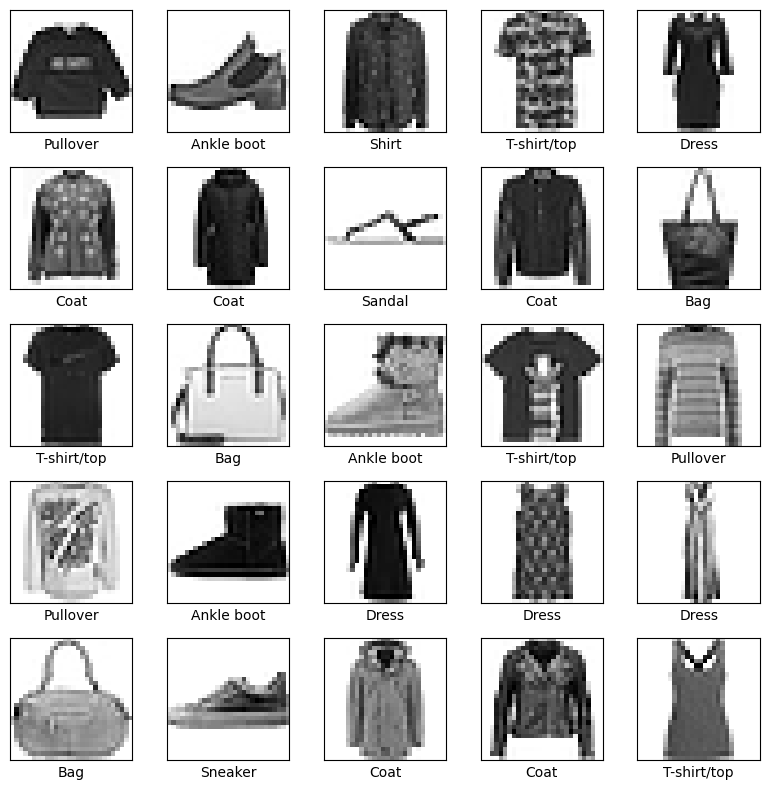

In [7]:
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([]), plt.yticks([]), plt.grid(False)
    plt.imshow(x_train[i], cmap='binary')
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)), Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)), Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'), Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                        

In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=5000, validation_split=0.05)

Epoch 1/50
12/12 [==============================] - 76s 6s/step - loss: 2.0184 - accuracy: 0.5003 - val_loss: 2.2456 - val_accuracy: 0.1757
Epoch 2/50
12/12 [==============================] - 64s 5s/step - loss: 0.8682 - accuracy: 0.6962 - val_loss: 4.8234 - val_accuracy: 0.0997
Epoch 3/50
12/12 [==============================] - 73s 5s/step - loss: 0.7148 - accuracy: 0.7496 - val_loss: 7.6048 - val_accuracy: 0.0990
Epoch 4/50
12/12 [==============================] - 62s 5s/step - loss: 0.6246 - accuracy: 0.7808 - val_loss: 9.7295 - val_accuracy: 0.0990
Epoch 5/50
12/12 [==============================] - 61s 5s/step - loss: 0.5596 - accuracy: 0.8045 - val_loss: 11.1445 - val_accuracy: 0.0990
Epoch 6/50
12/12 [==============================] - 74s 6s/step - loss: 0.5136 - accuracy: 0.8172 - val_loss: 11.9307 - val_accuracy: 0.0990
Epoch 7/50
12/12 [==============================] - 64s 5s/step - loss: 0.4758 - accuracy: 0.8319 - val_loss: 12.0738 - val_accuracy: 0.0990
Epoch 8/50
12/12 

In [ ]:
model.evaluate(x_test, y_test)
y_pred = model.predict(x_test).argmax(axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9328 - loss: 0.1990
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


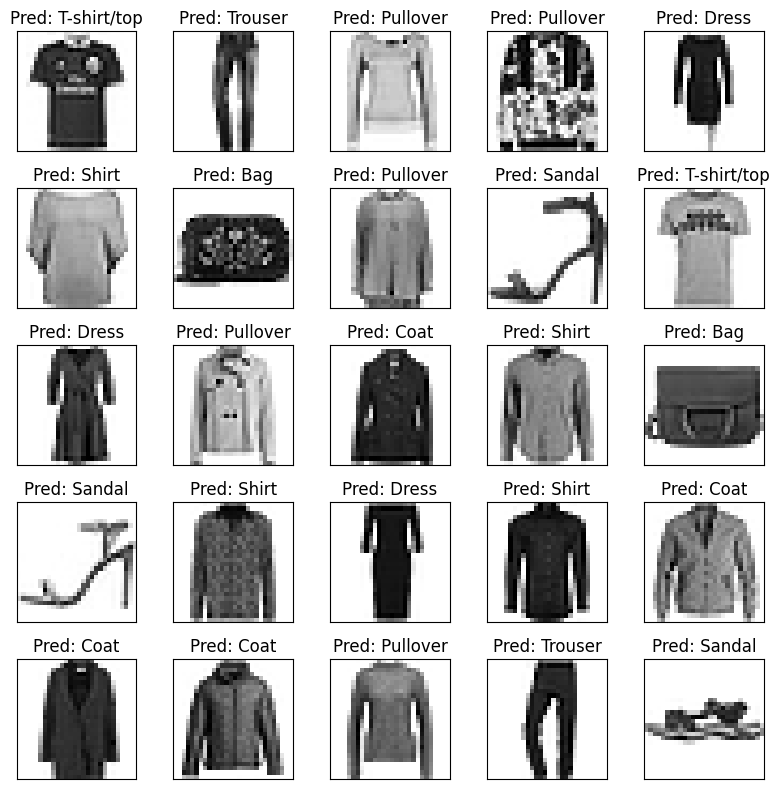

In [ ]:
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([]), plt.yticks([]), plt.grid(False)
    plt.imshow(x_test[i], cmap='binary')
    plt.title(f"Pred: {class_names[y_pred[i]]}")
plt.tight_layout()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.92      0.89      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.86      0.94      0.90      1000
       Dress       0.93      0.95      0.94      1000
        Coat       0.91      0.89      0.90      1000
      Sandal       1.00      0.97      0.98      1000
       Shirt       0.90      0.74      0.81      1000
     Sneaker       0.96      0.97      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.96      0.98      0.97      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

